# Web of Science - Fighting words analysis

### Load wos_econ, wos_soc and join them


In [6]:
import sys
sys.path.append("./../helper") # find scripts
maxInt = sys.maxsize

from common_imports import *
from helpers import *

#from load_data import wos_soc, wos_econ   # web of science
from load_constellate import wos_soc, wos_econ # constellate

import convokit
from convokit import FightingWords
from convokit import Corpus, Utterance, Speaker

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
wos = wos_econ+wos_soc

### Create convokit corpuses by decade

In [8]:
tstart = 1901
corpuses = [] # container to save corpuses by decade

while tstart<=2011:
    
    utterances = [] # container to save utterances by decade
    
    tend=tstart+9 # last year of decade
    
    
    articles_dec = [article for article in wos if tryInt(article['year']) in range(tstart, tend)]
        
    for article in articles_dec:
        utterances.append( Utterance(id=str(article['id']), conversation_id=str(article['id']), text=article['title'], speaker=Speaker(id=str(article['author'])), meta={'discipline': article['discipline']}) )
    
    corpuses.append( Corpus(utterances=utterances) )   
        
    
    tstart+=10 # go to next decade

In [9]:
len(corpuses)

12

In [10]:
corpuses[0].random_utterance() # random article from first decade
corpuses[0].get_utterances_dataframe().head() # dataframe of articles from first decade

Utterance({'obj_type': 'utterance', 'meta': {'discipline': 'econ'}, 'vectors': [], 'speaker': Speaker({'obj_type': 'speaker', 'meta': {}, 'vectors': [], 'owner': None, 'id': ''}), 'conversation_id': '190031', 'reply_to': None, 'timestamp': None, 'text': 'analysis profit endowment assurances discussion', 'owner': <convokit.model.corpus.Corpus object at 0x000001DE7C516B50>, 'id': '190031'})

,timestamp,text,speaker,reply_to,conversation_id,meta.discipline,vectors
id,,,,,,,
105714,None,educational intelligence,,None,105714,econ,[]
106035,None,editorial,,None,106035,econ,[]
106072,None,front matter,,None,106072,econ,[]
106153,None,editorial notes,,None,106153,econ,[]
107054,None,closing exercise,,None,107054,econ,[]


### Fighting words analysis by decade

In [11]:
fw = []
fw_sum = []
for i, corpus in enumerate(corpuses):
    print(i)
    fw.append( FightingWords(ngram_range=(1,1)) )
    fw[i].fit(corpus, class1_func=lambda utt: utt.meta['discipline'] == 'soc',
                      class2_func=lambda utt: utt.meta['discipline'] == 'econ')
    fw_sum.append( fw[i].summarize(corpus, plot=False, class1_name='soc', class2_name='econ')  ) 

0
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 845 valid corpus components. class2_func returned 1955 valid corpus components.
Vocab size is 222
Comparing language...
ngram zscores computed.


1
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1286 valid corpus components. class2_func returned 3928 valid corpus components.
Vocab size is 407
Comparing language...
ngram zscores computed.


2
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 1972 valid corpus components. class2_func returned 5344 valid corpus components.
Vocab size is 557
Comparing language...
ngram zscores computed.


3
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 3024 valid corpus components. class2_func returned 9142 valid corpus components.
Vocab size is 814
Comparing language...
ngram zscores computed.


4
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 3678 valid corpus components. class2_func returned 10281 valid corpus components.
Vocab size is 915
Comparing language...
ngram zscores computed.


5
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 5318 valid corpus components. class2_func returned 14331 valid corpus components.
Vocab size is 1289
Comparing language...
ngram zscores computed.


6
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 7217 valid corpus components. class2_func returned 20900 valid corpus components.
Vocab size is 1785
Comparing language...
ngram zscores computed.


7
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 11764 valid corpus components. class2_func returned 34814 valid corpus components.
Vocab size is 2792
Comparing language...
ngram zscores computed.


8
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 13492 valid corpus components. class2_func returned 43598 valid corpus components.
Vocab size is 3511
Comparing language...
ngram zscores computed.


9
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 15178 valid corpus components. class2_func returned 49751 valid corpus components.
Vocab size is 4072
Comparing language...
ngram zscores computed.


10
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 17514 valid corpus components. class2_func returned 55450 valid corpus components.
Vocab size is 4962
Comparing language...
ngram zscores computed.


11
Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 13654 valid corpus components. class2_func returned 40679 valid corpus components.
Vocab size is 4420
Comparing language...
ngram zscores computed.


### Descriptives

In [12]:
fw_sum[0][fw_sum[0]['z-score'].between(-2, 2)]

,z-score,class
ngram,,
prices,-1.902266,econ
recent,-1.866614,econ
economic,-1.841564,econ
labour,-1.833073,econ
kingdom,-1.759214,econ
...,...,...
philadelphia,1.831985,soc
development,1.841310,soc
first,1.897506,soc


In [14]:
fw[11].get_top_k_ngrams(15)

(['article',
  'review',
  'social',
  'gender',
  'women',
  'black',
  'life',
  'sexual',
  'being',
  'identity',
  'family',
  'religious',
  'well',
  'violence',
  'community'],
 ['evidence',
  'financial',
  'market',
  'policy',
  'growth',
  'trade',
  'economic',
  'industry',
  'insurance',
  'investment',
  'markets',
  'economics',
  'price',
  'corporate',
  'economy'])

12

### Plot selected z-scores across time

In [43]:
def pltZ(fw, word):
    yrs=np.linspace(start=1900, stop=2020, num=12).astype(np.int32)
    p = plt.plot(yrs, [tryInt(scores.get_zscore(word), flt=True) for scores in fw]);
    p = plt.axhline(y=0, color='r', linestyle='-');
    p = plt.ylabel("econ <---> soc");
    p = plt.title("Term: "+word)
    return(p)

<AxesSubplot:>

Text(0.5, 1.0, 'Term: family')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: education')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: women')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: organization')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: migration')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: policy')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: government')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: inequality')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: racial')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: ties')

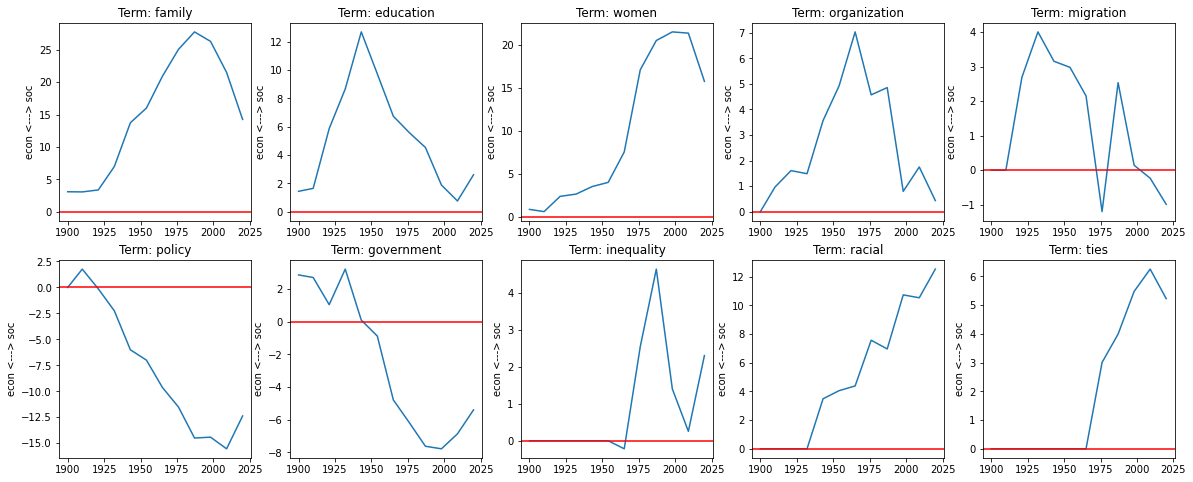

In [101]:
import numpy as np
import matplotlib.pyplot as plt


f = plt.figure(figsize=(20,8))

r=2
c=5

plt.subplot(r, c, 1) 
pltZ(fw, "family")

plt.subplot(r, c, 2)
pltZ(fw, "education")

plt.subplot(r, c, 3)
pltZ(fw, "women")

plt.subplot(r, c, 4)
pltZ(fw, "organization")

plt.subplot(r, c, 5)
pltZ(fw, "migration")

plt.subplot(r, c, 6) 
pltZ(fw, "policy")

plt.subplot(r, c, 7)
pltZ(fw, "government")

plt.subplot(r, c, 8)
pltZ(fw, "inequality")

plt.subplot(r, c, 9)
pltZ(fw, "racial")

plt.subplot(r, c, 10)
pltZ(fw, "ties")

plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'Term: theory')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: experiment')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: cause')

<AxesSubplot:>

Text(0.5, 1.0, 'Term: qualitative')

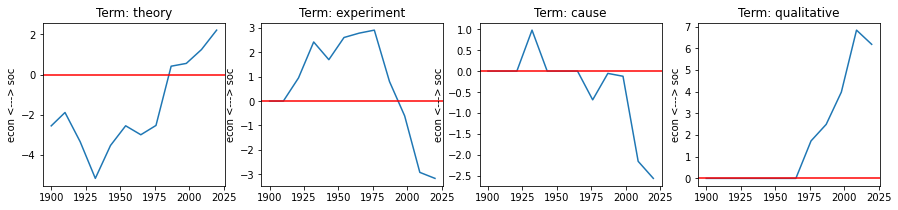

In [113]:
import numpy as np
import matplotlib.pyplot as plt


f = plt.figure(figsize=(15,3))

r=1
c=4

plt.subplot(r, c, 1) 
pltZ(fw, "theory")

plt.subplot(r, c, 2)
pltZ(fw, "experiment")

plt.subplot(r, c, 3)
pltZ(fw, "cause")

plt.subplot(r, c, 4)
pltZ(fw, "qualitative")

plt.show()

In [13]:
# eof